In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)


# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os


# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

from matplotlib import font_manager, rc
import platform


path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)


mpl.rcParams['axes.unicode_minus'] = False


# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3


import seaborn as sns

import scipy as sp
from scipy import stats


# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"


# 노트북 실행 결과를 동일하게 유지하기 위해
# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경되면
# 훈련용 데이터가 자주 변ㅕ되면 결국 모든 데터를 가지고 모델을 생성하는 결과
# Outfit을 만드는 효과를 가져옴.
np.random.seed(42)

# 이진 분류를 위한 데이터 생성
훈련 데이터와 테스트 데이터 분리

In [64]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist)

# 실행 시간: 15.3s

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [65]:
X, y = mnist['data'], mnist['target']

# 데이터는 784픽셀을 가진 흑백 이미지로 실제 크기는 28 * 28
# 각 픽셀은 0 ~ 255 까지의 값을 가짐.
print(X.shape)
print(y.shape)

# 타겟의 자료형 확인
print(type(y[0]))

# 하나의 이미지 출력
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

# plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis('off')

# 범주형 데이터의 자료형은 정수를 권장함.
# 타겟의 자료형 변경

# np.int -> numpy 버전이 변경되면서 없어짐.
y = y.astype(np.uint8)
print(type(y[0]))

(70000, 784)
(70000,)
<class 'str'>
<class 'numpy.uint8'>


In [66]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [67]:
# 이진 분류는 True, False로 분류
# 이진 분류의 경우는 Target 이 bool

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[False False False ... False  True False]


# 훈련 및 데이터 예측

In [68]:
from sklearn.linear_model import SGDClassifier

# 훈련에 사용할 모델을 생성 - 하이퍼파라미터를 설정함. (하이퍼파라미터 확인하기 중요.)
# max_iter는 최대 반복 횟수
# tol은 정밀도
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# 훈련
sgd_clf.fit(X_train, y_train_5)

#예측 - feature는 2차원 배열 이상이어야 한다.
# Reshape your data either using array. reshape (-1, 1) if your data has a single feature or array. reshape (1, -1) if it contains a single sample.
sgd_clf.predict([some_digit])

# 실행 시간: 22.5s
# 데이터 개수: 1

array([ True])

# K겹 교차 검증을 이용한 정확도 측정

In [69]:
from sklearn.model_selection import cross_val_score

# 3번 교차 검증하는데 평가지표는 정확도
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95, 0.96, 0.96])

In [70]:
# 새로운 분류기를 가지고 훈련하고 교차 검증.
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.911, 0.909, 0.909])

# 분류의 평가지표


### 오차 행렬 (Confusion Matrix)

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# 확률적 경사하강법 모델을 가지고 훈련한 후 값을 예측함.
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

# 다른 평가 지표 계산

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('정확도: ', accuracy_score(y_train_5, y_train_pred))
print('정밀도: ', precision_score(y_train_5, y_train_pred))
print('재현율: ', recall_score(y_train_5, y_train_pred))
print('f1_score: ', f1_score(y_train_5, y_train_pred))

정확도:  0.9570333333333333
정밀도:  0.8370879772350012
재현율:  0.6511713705958311
f1_score:  0.7325171197343846


In [73]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

# 전체 훈련 데이터의 점수를 출력
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method='decision_function')
print(y_scores)

[2164.22]
[  1200.931 -26883.792 -33072.035 ...  13272.127  -7258.472 -16877.508]


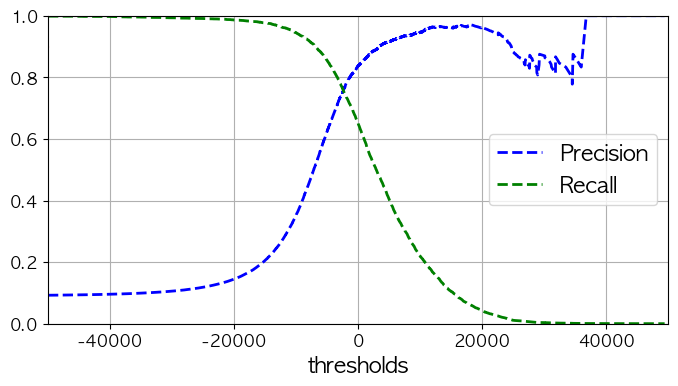

In [74]:
# 정밀도와 재현율 트레이드 오프
from sklearn.metrics import precision_recall_curve

# 정밀도, 재현율, 임계값을 전부 추출
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# 정밀도와 재현율 그래프를 그려주는 함수
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g--", label='Recall', linewidth=2)

    plt.legend(loc='center right', fontsize=16)
    plt.xlabel('thresholds', fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# Precision, Recall의 0.9가 되는 위치를 조회
recall_90_precision = recalls[np.argmax(precisions >= 90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 90)]

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             

plt.show()
# precision_recall_curve - Returns
#     -------
#     precision : ndarray of shape (n_thresholds + 1,)
#         Precision values such that element i is the precision of
#         predictions with score >= thresholds[i] and the last element is 1.
    
#     recall : ndarray of shape (n_thresholds + 1,)
#         Decreasing recall values such that element i is the recall of
#         predictions with score >= thresholds[i] and the last element is 0.
    
#     thresholds : ndarray of shape (n_thresholds,)
#         Increasing thresholds on the decision function used to compute
#         precision and recall where `n_thresholds = len(np.unique(probas_pred))`.

In [75]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

print(precision_score(y_train_5, y_train_pred_90))

print(recall_score(y_train_5, y_train_pred_90))

0.09035
1.0


# ROC 곡선

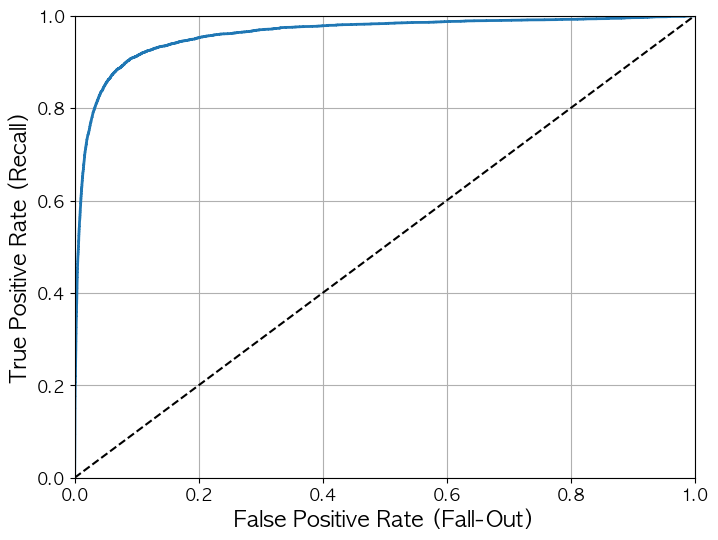

0.960

In [76]:
from sklearn.metrics import roc_curve

# 그래프에 사용할 값 계산
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각선 - 완전 랜덤인 경우
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# 점선 - 완전 랜덤 분류기
# 점선으로부터 멀어질수록 좋은 분류기
# 가장 좋은 분류기는 하단의 면적이 1이 됨.
# 면적의 값은 roc_auc_score 라는 함수로 계산 가능하다.

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores) # 0.960


# 이진 분류기를 이용한 다양한 처리


In [77]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
print(svm_clf.predict([some_digit]))

some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)



[5]
[[ 2.816  7.092  3.83   0.794  5.889  9.297  1.799  8.104 -0.228  4.838]]


# SGD를 이용한 다중 분류

In [78]:
sgd_clf.fit(X_train, y_train)

# 예측
print(sgd_clf.predict([some_digit]))

# 결정 점수 확인
print(sgd_clf.decision_function([some_digit]))

KeyboardInterrupt: 

In [ ]:
# 교차 검증을 이용한 정확도 확인
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.874, 0.858, 0.869])

In [ ]:
# 특성이 여러개 이고 이 특성의 값의 분포가 일정하지 않은 경우
# scailing 이나 standardizaion을 고려
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

In [ ]:
y_train_predict = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

NameError: name 'cross_val_predict' is not defined

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
# 오차 행렬을 각 행의 합계로 나누고 대각선을 0 으로 채움
# 잘못 분류된 모델을 확인해 볼 수 있다.
# 오류가 많이 발생하는 클래스가 있다면 그 클래스의 데이터를 조금 더 넣어서 
# 모델을 만들거나 결과가 나온 데이터를 가지고 다시 한 번 모델을 만든다던가 전처리 작업을 수행
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# 주 대각선 방향을 0으로 채움
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# 다중 레이블 분류m

# LDA(선형판별분석)

In [ ]:
# borrowscore 와 Payment_inc_ratio에 따른 outcome 선형 판별 분석
loan3000 = pd.read_csv('../data/loan3000.csv')
print(loan3000.head())

NameError: name 'pd' is not defined

In [ ]:
loan3000.outcome = loan3000.outcome.astype('category')

# 숫자 컬럼드릐 상관계수를 전부 출력
print(loan3000.corr())

#독립 변수와 종속 변수를 설정
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

# 독립 변수 - feature
X = loan3000[predictors]

# 종속 변수 - target
y = loan3000[outcome]

print(X)
print(y)

NameError: name 'loan3000' is not defined

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)

# 최적의 값을 확인 (경계값)
print(pd.DataFrame(loan_lda.scalings_, index=X.columns))

In [ ]:
# 예측에 대한 확률 출력 (default와 paid_off의 확률을 확인)
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]),
                    columns=loan_lda.classes_)
print(pred.head())

# KNN 알고리즘을 이용한 분류

loan_200.csv 파일의 데이터를 읽어서 payment_inc_ratio와 dti를 이용해서 outcome을 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

loan200 = pd.read_csv('../data/loan200.csv')
print(loan200.head)
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X, y)
print(knn.predict(newloan))

print(knn.predict_proba(newloan))

# 표준화를 수행한 경우와의 차이

In [ ]:
loan_data = pd.read_csv('../data/loan_data.csv.gz')
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'],
                                      categories=['paid off', 'default'],
                                      ordered=True)

predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
print(newloan)

In [ ]:
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X, y)
nbrs = knn.kneighbors(newloan) 
print(X.iloc[nbrs[1][0], :])

In [ ]:
from sklearn import preprocessing

newloan = loan_data.loc[0:0, predictors]

X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler() 
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_std, y)

# 이전에 비해서 revol_bal 을 제외한 속성의 거리들이 가까워 짐.
nbrs = knn.kneighbors(newloan_std) 
print(X.iloc[nbrs[1][0], :])    

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int_)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Iris virginica')

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.figure(figsize=(8, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

print(decision_boundary) # 1.661보다 크거나 같으면 virginica가 됨.

# ---------------------------------------------

In [ ]:
X = iris['data'][:, (2, 3)]
print(X)

y = iris['target']
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [ ]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs',
                                 C = 10, random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [ ]:
# 샘플 데터 생성
# linspace 는 범위 안에 일정한 간격을 갖는 숫자 배열 생성
# linspace(0, 1, 5) : [0, 0.25, 0.5, 0.75, 1]
# reshape는 shape 변경 -  -1을 설정하면 나머지 전체

# meshgrid는 격자 좌표 생성
#x0 은 500행 500열 크기의 격자
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)

# 예측에 사용할 샘플 데이터
X_new = np.c_[x0.ravel(), x1.ravel()]

[[0.    0.016 0.032 ... 7.968 7.984 8.   ]
 [0.    0.016 0.032 ... 7.968 7.984 8.   ]
 [0.    0.016 0.032 ... 7.968 7.984 8.   ]
 ...
 [0.    0.016 0.032 ... 7.968 7.984 8.   ]
 [0.    0.016 0.032 ... 7.968 7.984 8.   ]
 [0.    0.016 0.032 ... 7.968 7.984 8.   ]] [[0.    0.    0.    ... 0.    0.    0.   ]
 [0.018 0.018 0.018 ... 0.018 0.018 0.018]
 [0.035 0.035 0.035 ... 0.035 0.035 0.035]
 ...
 [3.465 3.465 3.465 ... 3.465 3.465 3.465]
 [3.482 3.482 3.482 ... 3.482 3.482 3.482]
 [3.5   3.5   3.5   ... 3.5   3.5   3.5  ]]


In [ ]:
# 샘플 데이터 예측
y_proba = softmax_reg.predict_proba(X_new)

# 각 샘플의 확률을 조회
y_predict = softmax_reg.predict(X_new)


[[1.000e+00 3.761e-06 6.800e-20]
 [1.000e+00 4.059e-06 7.857e-20]
 [1.000e+00 4.380e-06 9.079e-20]
 ...
 [7.738e-23 1.037e-11 1.000e+00]
 [6.697e-23 9.684e-12 1.000e+00]
 [5.796e-23 9.044e-12 1.000e+00]] [0 0 0 ... 2 2 2]


# Support Vector Machine
## 선형 SVM을 이용한 이진 분류

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42)),])

svm_clf.fit(X, y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
# 예측
# 1이 나오면 2번 클래스가 맞다는 것이고 0이 나오면 2번 클래스가 아님.
print(svm_clf.predict([[5.5, 1.7]]))

[1.]


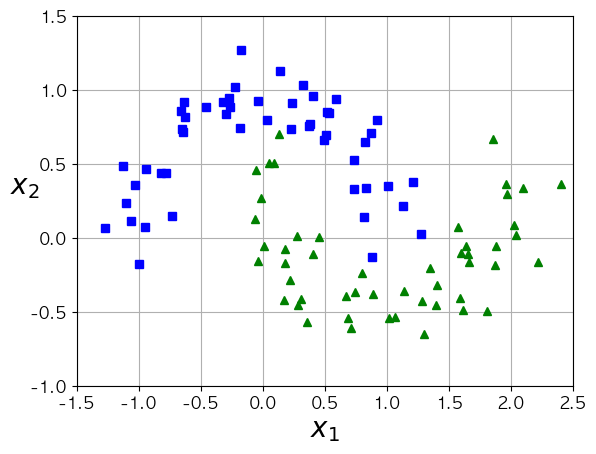

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# degree 값을 높이면  차수가 높아져서 곡선이 복잡해진다.
# 훈련데이터에 대해서 잘 구분하게 되지만 새로운 데이터는 잘 구분하지 못할 수 잇따.
# 이러한 상황을 overfitting(과적합)이라고 한다.
from sklearn.svm import SVC

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=5)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

/var/folders/8y/qly304_55c1cf35dff76v_lh0000gn/T/ipykernel_2189/394698276.py:8: UserWarning: The following kwargs were not used by contour: 'alhpa'
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alhpa=0.2)


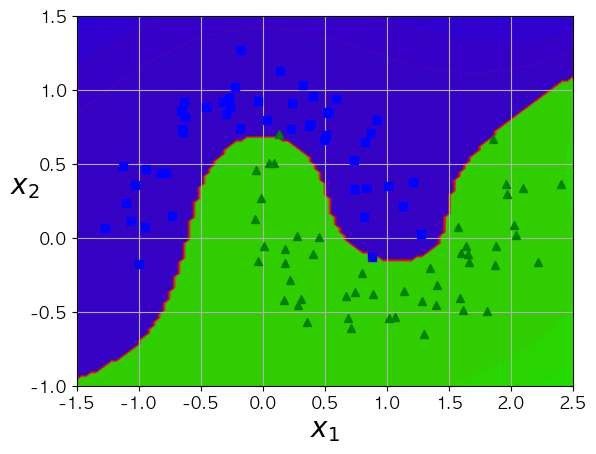

In [ ]:
def plot_prediction(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alhpa=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_prediction(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [81]:
from sklearn.tree import export_graphviz
'''
#windows 에서만 추가
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
'''
import graphviz
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

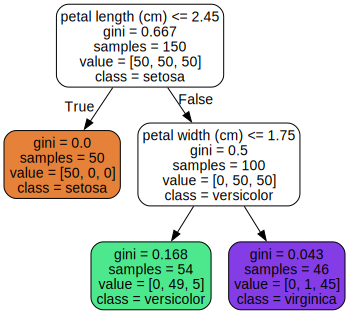

In [86]:
from sklearn.tree import export_graphviz
import graphviz

with open('iris_tree.dot') as f:
    dot_graph = f.read()

src = graphviz.Source(dot_graph)

src

In [91]:
y_pred = tree_clf.predict([[5, 1.5]])

y_proba = tree_clf.predict_proba([[5, 1.5]])
print(y_pred)
print(y_proba)

[1]
[[0.    0.907 0.093]]


In [96]:
df = sns.load_dataset('titanic')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [97]:
pd.set_option('display.max_columns', 15)

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

rdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [98]:
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [100]:
# 범주형인지 확인 - 2개의 값 밖에 없음.
ndf['sex'].unique() # 범주형

# 범주형이라면 순서 여부를 확인해야 함.
# 순서가 없다면 원핫인코딩, 순서가 있으면 oridinal encoding을 수행

array(['male', 'female'], dtype=object)

In [121]:
# onehot_sex = pd.get_dummies(ndf['sex'])
# print(onehot_sex)
# ndf = pd.concat([ndf, onehot_sex], axis=1)

# 순서가 없으므로 원 핫 인코딩 - 앞에 town을 붙여서 컬럼 이름을 생성
# ndf['embarked'].unique()

# onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
# ndf = pd.concat([ndf, onehot_embarked], axis=1)

# ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [124]:
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
         'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

print(X.head())
print(y.head())

   pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0       3  22.0      1      0       0     1       0       0       1
1       1  38.0      1      0       1     0       1       0       0
2       3  26.0      0      0       1     0       0       0       1
3       1  35.0      1      0       1     0       0       0       1
4       3  35.0      0      0       0     1       0       0       1
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [128]:
# feature(독립 변수, 설명 변수)를 정규화
from sklearn import preprocessing

# feature값이 범위나 분포가 차이 많이 나는 경우 수행
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[ 0.911 -0.53   0.525 ... -0.472 -0.202  0.533]
 [-1.476  0.572  0.525 ...  2.12  -0.202 -1.876]
 [ 0.911 -0.255 -0.552 ... -0.472 -0.202  0.533]
 ...
 [-1.476 -0.737 -0.552 ... -0.472 -0.202  0.533]
 [-1.476 -0.255 -0.552 ...  2.12  -0.202 -1.876]
 [ 0.911  0.159 -0.552 ... -0.472  4.95  -1.876]]


In [132]:
from sklearn.model_selection import train_test_split

# 30% 데이터는 test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(499, 9)
(215, 9)


# decision tree

In [135]:
from sklearn import tree
# 불순도 지표는 엔트로피를 사용하고 중간 가지의 최대 개수는 5로 설정.
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

print(y_hat)

[0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0]


In [136]:
# 예측된 결과 확인
print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 1 1 0 0 0 1 0 1]
[0 1 1 1 0 1 1 1 0 0]


## 평가 지표 확인

In [138]:
# 평가 지표 확인
from sklearn import metrics

# 오차 행렬 출력
tree_matrix =metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[103  23]
 [ 29  60]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       126
           1       0.72      0.67      0.70        89

    accuracy                           0.76       215
   macro avg       0.75      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



(-1.000, 9.000)

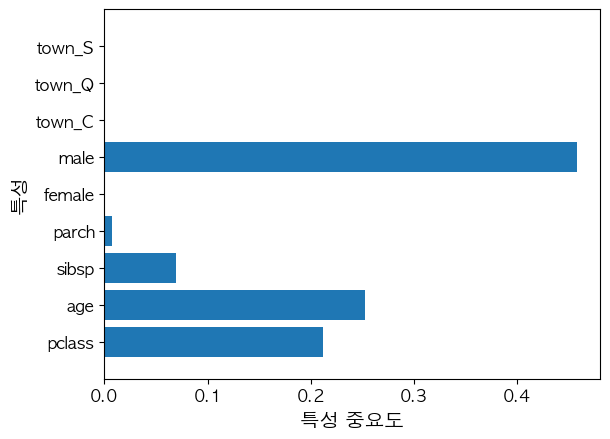

In [139]:
#특성 중요도 파악
n_features = X.data.shape[1]

plt.barh(np.arange(n_features), tree_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S'])
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)

In [1]:
#하이퍼 파라미터 조정
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(tree_model, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

NameError: name 'tree_model' is not defined